> # California House Price #

Regression problem like house price can be solved by neural network.

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X, y = housing.data, housing.target

In [4]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Major difference from classification mlp is that output layer is a neuron which doesn't have activation fuction. And loss fuction is MSE.

In [7]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')

In [8]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8702 - val_loss: 2.3052
Epoch 2/30
363/363 [==============================] - 0s 843us/step - loss: 3.5998 - val_loss: 0.5196
Epoch 3/30
363/363 [==============================] - 0s 741us/step - loss: 0.5134 - val_loss: 0.4589
Epoch 4/30
363/363 [==============================] - 0s 869us/step - loss: 0.4576 - val_loss: 0.4378
Epoch 5/30
363/363 [==============================] - 0s 712us/step - loss: 0.4454 - val_loss: 0.4291
Epoch 6/30
363/363 [==============================] - 0s 742us/step - loss: 0.4345 - val_loss: 0.4149
Epoch 7/30
363/363 [==============================] - 0s 774us/step - loss: 0.4240 - val_loss: 0.4046
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4350 - val_loss: 0.4099
Epoch 9/30
363/363 [==============================] - 0s 697us/step - loss: 0.4169 - val_loss: 0.4017
Epoch 10/30
363/363 [==============================] - 0s 766us/step - loss: 0.4088 - 

In [9]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 608us/step - loss: 0.3601


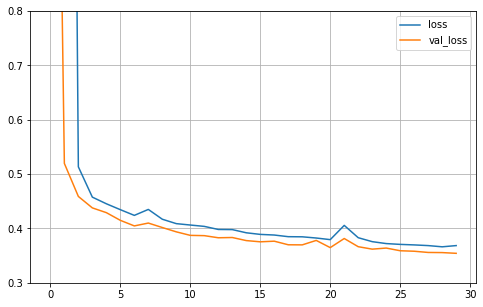

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(0.3, 0.8); plt.grid(True)